In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,  accuracy_score



CHARGEMENT DES DONNEES

In [34]:
iris=load_iris()
#data_frame
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"]=iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


-04 variables quantitatives
-2 variables qualitatives

valeurs propres: [2.93808505 0.9201649  0.14774182 0.02085386])


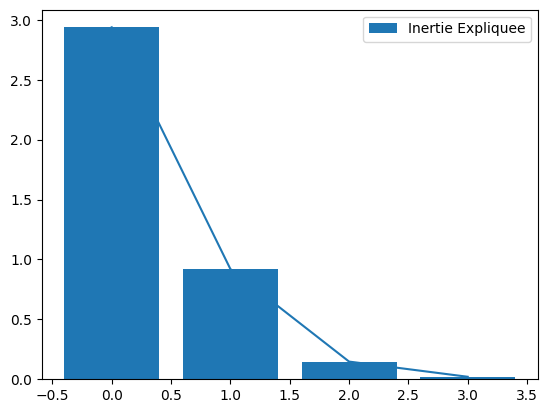

In [36]:
# ACP avec scikitlearn
#standardiser les donnees
#INSTANCIER le standardiseur
scaler=StandardScaler( with_mean=True, with_std=True)
#transformer
Xcr=scaler.fit_transform(iris.data)
pca=PCA()
#estimer l'ACP
pca.fit(Xcr)
#composantes principales
Cp=pca.transform(Xcr)
# Affichage des valeurs propres
print(f"valeurs propres: {pca.explained_variance_})")
#ebouli des valeurs propres
plt.figure()
plt.bar([0,1,2,3], pca.explained_variance_, label="Inertie Expliquee")
#plt.scatter([0, 1, 2, 3], pca.explained_variance_, label="Inertie Expliquee")
plt.plot(pca.explained_variance_)
plt.legend(loc="best")
plt.show()


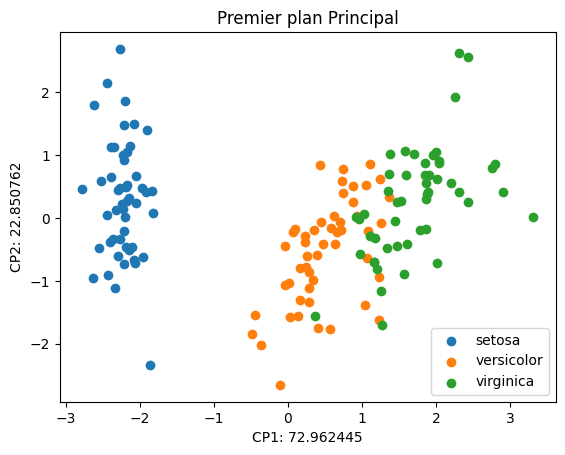

In [39]:
plt.figure()
for j in np.unique(iris.target):
    indices = np.where(iris.target == j)[0]
    plt.scatter(Cp[indices, 0], Cp[indices, 1], label=f"{iris.target_names[j]}")
plt.xlabel(f"CP1: { pca.explained_variance_ratio_[0]*100:2f}")
plt.ylabel(f"CP2: { pca.explained_variance_ratio_[1]*100:2f}")
plt.title("Premier plan Principal") 
plt.legend(loc="best") 
plt.show()    



In [38]:
# pour l'AFD sur les donnees iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Donnees explicatives
X = iris.data
# DOnnees expliquees ou labesl
Y = iris.target_names[iris.target]
# Instancier le classifieur
lda=LinearDiscriminantAnalysis()
# Estimer le predicteur
lda.fit(X, Y)
# predire les classes
ypredict= lda.transform(X)
#Accuracy: pourcentages de bien classes
Accuracy = accuracy_score(Y, ypredict)
print(Accuracy)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets